Step 1: Load and Merge the DataFramesfffffv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the four CSV files
orders_df = pd.read_csv('orders.csv')
order_details_df = pd.read_csv('order_details.csv')
pizzas_df = pd.read_csv('pizzas.csv', encoding='latin-1')
pizza_types_df = pd.read_csv('pizza_types.csv', encoding='latin-1')

In [6]:
# Merge the dataframes. The order is important.
merged_df = pd.merge(order_details_df, pizzas_df, on='pizza_id', how='inner')
merged_df = pd.merge(merged_df, pizza_types_df, on='pizza_type_id', how='inner')
final_df = pd.merge(merged_df, orders_df, on='order_id', how='inner')
final_df

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",2015-12-31,21:23:10
48616,48617,21348,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",2015-12-31,21:23:10
48617,48618,21348,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",2015-12-31,21:23:10
48618,48619,21349,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-12-31,22:09:54


Calculate total price for each order detail

In [7]:
final_df['total_price'] = final_df['quantity'] * final_df['price']
final_df

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",2015-12-31,21:23:10,16.75
48616,48617,21348,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",2015-12-31,21:23:10,17.95
48617,48618,21348,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",2015-12-31,21:23:10,12.00
48618,48619,21349,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-12-31,22:09:54,20.25


Convert date and time columns to datetime objects

In [8]:

final_df['datetime'] = pd.to_datetime(final_df['date'] + ' ' + final_df['time'])
final_df

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,total_price,datetime
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25,2015-01-01 11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00,2015-01-01 11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50,2015-01-01 11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75,2015-01-01 11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00,2015-01-01 11:57:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",2015-12-31,21:23:10,16.75,2015-12-31 21:23:10
48616,48617,21348,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",2015-12-31,21:23:10,17.95,2015-12-31 21:23:10
48617,48618,21348,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",2015-12-31,21:23:10,12.00,2015-12-31 21:23:10
48618,48619,21349,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-12-31,22:09:54,20.25,2015-12-31 22:09:54


# 2. Analysis

1. What is the total revenue/sales?

In [9]:
total_revenue = final_df['total_price'].sum()
print(f"Total Revenue/Sales: ${total_revenue:,.2f}")

Total Revenue/Sales: $817,860.05


2. Find the total quantity sold.

In [10]:
total_quantity_sold = final_df['quantity'].sum()
print(f"Total Quantity Sold: {total_quantity_sold}")

Total Quantity Sold: 49574


3. Find the total orders.

In [11]:
total_orders = final_df['order_id'].nunique()
print(f"Total Orders: {total_orders}")

Total Orders: 21350


4. How many pizza types do they sell?

In [12]:
num_pizza_types = final_df['pizza_type_id'].nunique()
print(f"Number of Pizza Types: {num_pizza_types}")

Number of Pizza Types: 32


5. Find the average price of the pizzas.

In [13]:
average_pizza_price = final_df['price'].mean()
print(f"Average Price of Pizzas: ${average_pizza_price:,.2f}")

Average Price of Pizzas: $16.49


6. What are the peak hours of sales?

In [14]:
final_df['hour'] = final_df['datetime'].dt.hour
sales_by_hour = final_df.groupby('hour')['total_price'].sum().sort_values(ascending=False)
print("\nPeak hours of sales:")
print(sales_by_hour.head())


Peak hours of sales:
hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
Name: total_price, dtype: float64


Plotting the sales by hour

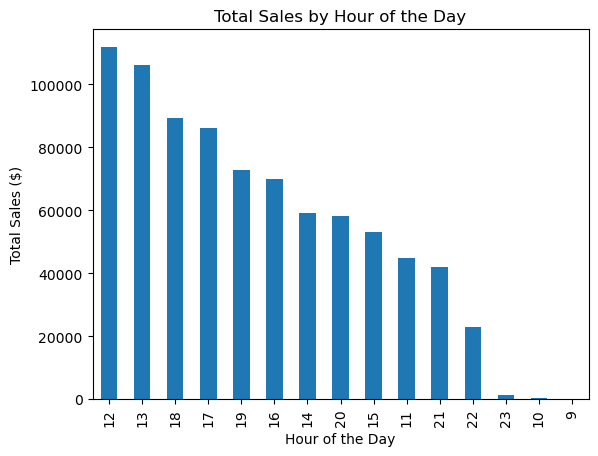

In [15]:
sales_by_hour.plot(kind='bar')
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales ($)')
plt.show()

7. Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

In [16]:
final_df['day_of_week'] = final_df['datetime'].dt.day_name()
sales_by_day = final_df.groupby('day_of_week')['total_price'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
most_sales_day = sales_by_day.idxmax()
print("\nTotal Sales by Day of the Week:")
print(sales_by_day)
print(f"\nDay with the most sales: {most_sales_day}")


Total Sales by Day of the Week:
day_of_week
Monday       107329.55
Tuesday      114133.80
Wednesday    114408.40
Thursday     123528.50
Friday       136073.90
Saturday     123182.40
Sunday        99203.50
Name: total_price, dtype: float64

Day with the most sales: Friday


Plotting the sales by day

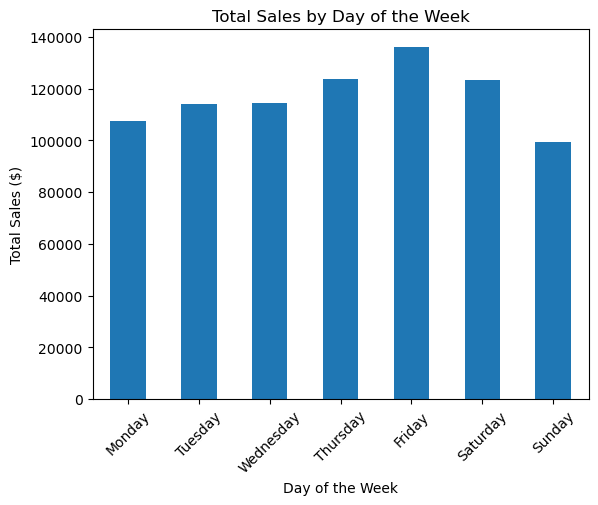

In [17]:
sales_by_day.plot(kind='bar')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

8. Find the top 5 bestselling pizzas.


Top 5 Bestselling Pizzas:
name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


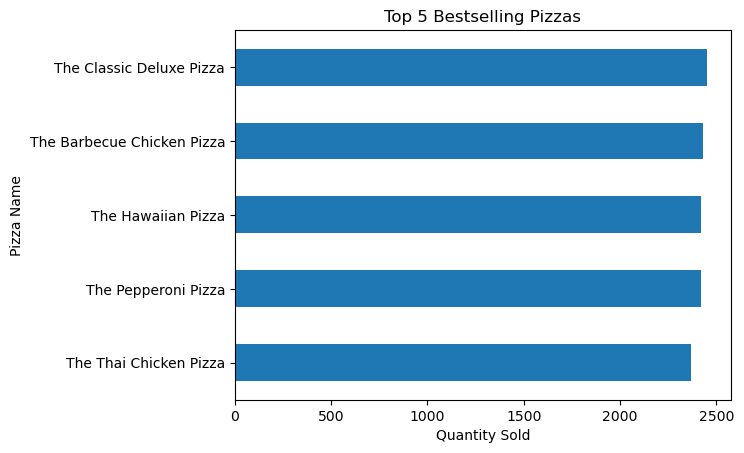

In [ ]:
top_5_pizzas = final_df.groupby('name')['quantity'].sum().nlargest(5)
print("\nTop 5 Bestselling Pizzas:")
print(top_5_pizzas)

# Plotting the top 5 pizzas

top_5_pizzas.sort_values().plot(kind='barh')
plt.title('Top 5 Bestselling Pizzas')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()

9. Find the sales made in each month. Any trend noticeable?


Total Sales by Month:
month
2015-01    69793.30
2015-02    65159.60
2015-03    70397.10
2015-04    68736.80
2015-05    71402.75
2015-06    68230.20
2015-07    72557.90
2015-08    68278.25
2015-09    64180.05
2015-10    64027.60
2015-11    70395.35
2015-12    64701.15
Freq: M, Name: total_price, dtype: float64


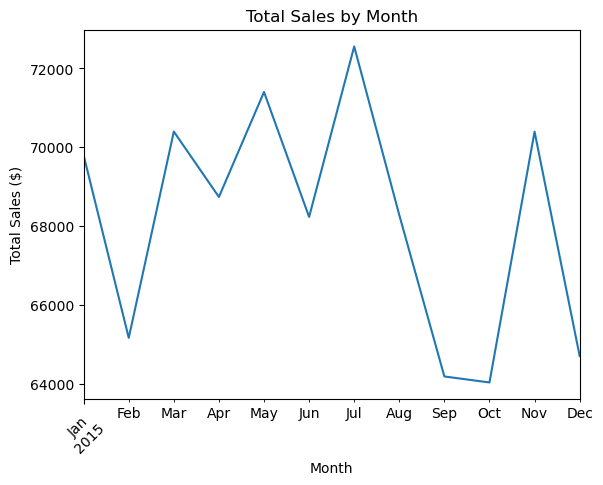

Trend: Sales appear to fluctuate but generally increase towards the end of the year.


In [19]:
final_df['month'] = final_df['datetime'].dt.to_period('M')
sales_by_month = final_df.groupby('month')['total_price'].sum()
print("\nTotal Sales by Month:")
print(sales_by_month)

# Plotting the sales by month

sales_by_month.plot(kind='line')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()
print("Trend: Sales appear to fluctuate but generally increase towards the end of the year.")

10. Are there pizza types that are not doing well on the menu?


Bottom 5 Pizzas by Quantity Sold:
name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64


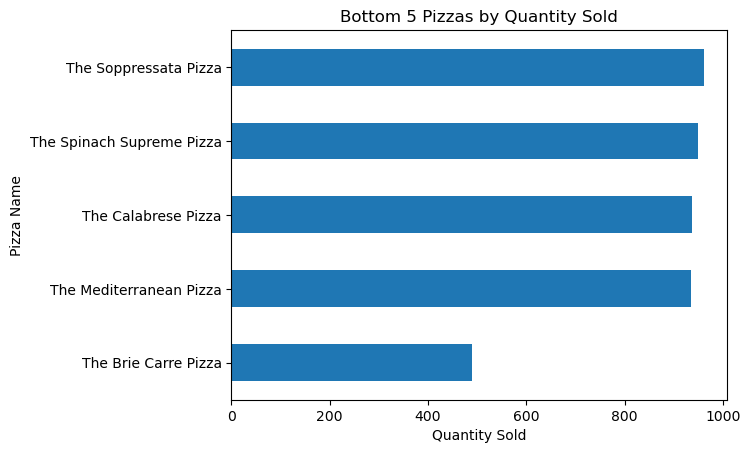

In [20]:

bottom_5_pizzas = final_df.groupby('name')['quantity'].sum().nsmallest(5)
print("\nBottom 5 Pizzas by Quantity Sold:")
print(bottom_5_pizzas)

# Plotting the bottom 5 pizzas

bottom_5_pizzas.sort_values().plot(kind='barh')
plt.title('Bottom 5 Pizzas by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()